# Numerical simulation of Kuramoto oscillator on graph.
## check the phase transition by recording the order parameter.


In [1]:
# import libraries.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# self-made module
from Kuramoto_model_v1 import Kuramoto_model
import pandas as pd
import seaborn as sns

record the order parameter(r) when you change the K (strength of connection)

In [2]:
# repeat 10 times each K
reptime = 10

K_list = np.logspace(-4, 1, 10)
# we reccord last 100 step
data_result = pd.DataFrame(index=[], columns = ["K", "op_abs", "time"])

In [6]:

for i in range(0, 10): #  i is index about list of K
    for j in range(0, 10): #  j is index about repeat times
        sys1 = Kuramoto_model()
        sys1.set_const(omega_cnst = np.random.normal(10, 1, sys1.N_osc), K_cnst=K_list[i])
        Phases, Ts = sys1.solve(0.05, 2000)
        abs_op =sys1.get_order_parameter()[0]
        for ti in range(100):
            result_series = pd.Series([K_list[i], abs_op[-ti], Ts[-ti] ], index= data_result.columns)
            data_result = data_result.append(result_series, ignore_index=True)
        print( "now:", i ,"-", j)

        

now: 0 - 0
now: 0 - 1
now: 0 - 2
now: 0 - 3
now: 0 - 4
now: 0 - 5
now: 0 - 6
now: 0 - 7
now: 0 - 8
now: 0 - 9
now: 1 - 0
now: 1 - 1
now: 1 - 2
now: 1 - 3
now: 1 - 4
now: 1 - 5
now: 1 - 6
now: 1 - 7
now: 1 - 8
now: 1 - 9
now: 2 - 0
now: 2 - 1
now: 2 - 2
now: 2 - 3
now: 2 - 4
now: 2 - 5
now: 2 - 6
now: 2 - 7
now: 2 - 8
now: 2 - 9
now: 3 - 0
now: 3 - 1
now: 3 - 2
now: 3 - 3
now: 3 - 4
now: 3 - 5
now: 3 - 6
now: 3 - 7
now: 3 - 8
now: 3 - 9
now: 4 - 0
now: 4 - 1
now: 4 - 2
now: 4 - 3
now: 4 - 4
now: 4 - 5
now: 4 - 6
now: 4 - 7
now: 4 - 8
now: 4 - 9
now: 5 - 0
now: 5 - 1
now: 5 - 2
now: 5 - 3
now: 5 - 4
now: 5 - 5
now: 5 - 6
now: 5 - 7
now: 5 - 8
now: 5 - 9
now: 6 - 0
now: 6 - 1
now: 6 - 2
now: 6 - 3
now: 6 - 4
now: 6 - 5
now: 6 - 6
now: 6 - 7
now: 6 - 8
now: 6 - 9
now: 7 - 0
now: 7 - 1
now: 7 - 2
now: 7 - 3
now: 7 - 4
now: 7 - 5
now: 7 - 6
now: 7 - 7
now: 7 - 8
now: 7 - 9
now: 8 - 0
now: 8 - 1
now: 8 - 2
now: 8 - 3
now: 8 - 4
now: 8 - 5
now: 8 - 6
now: 8 - 7
now: 8 - 8
now: 8 - 9
now: 9 - 0

In [7]:
data_result.shape

(10000, 3)

In [37]:
data_result.dtypes

K         float64
op_abs    float64
time      float64
dtype: object

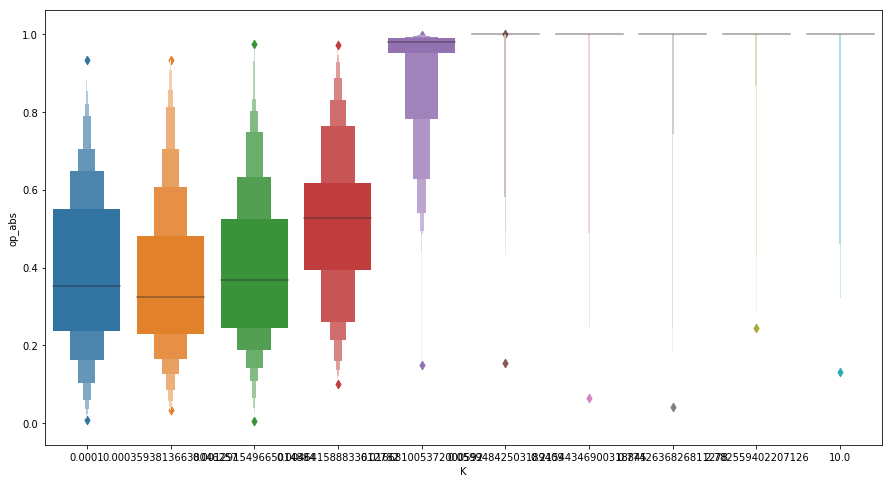

In [26]:
#pd.options.display.float_format = '{:.3f}'.format
fig, ax=plt.subplots(1, 1,figsize=(15, 8))
#fig.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))#y軸小数点以下3桁表示
ax = sns.lvplot(x=data_result["K"], y =data_result["op_abs"]) 


In [32]:
data_result.groupby("K")["op_abs"].mean()

K
0.000    0.390
0.000    0.363
0.001    0.396
0.005    0.515
0.017    0.926
0.060    0.995
0.215    0.993
0.774    0.994
2.783    0.996
10.000   0.993
Name: op_abs, dtype: float64

Text(0, 0.5, 'mean of order paramerter')

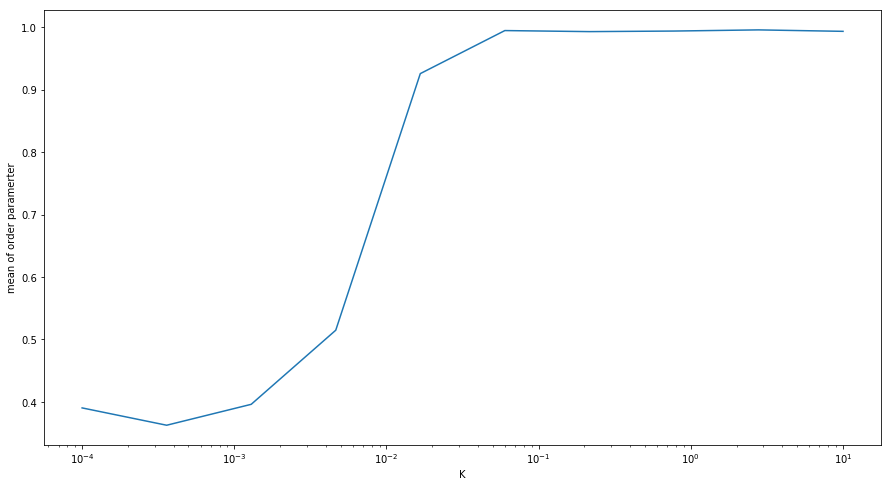

In [46]:
fig, ax=plt.subplots(1, 1,figsize=(15, 8))
ax.plot(K_list, data_result.groupby("K")["op_abs"].mean()) 
ax.set_xscale("log")
ax.set_xlabel("K")
ax.set_ylabel("mean of order paramerter")



Text(0, 0.5, 'mean of order paramerter')

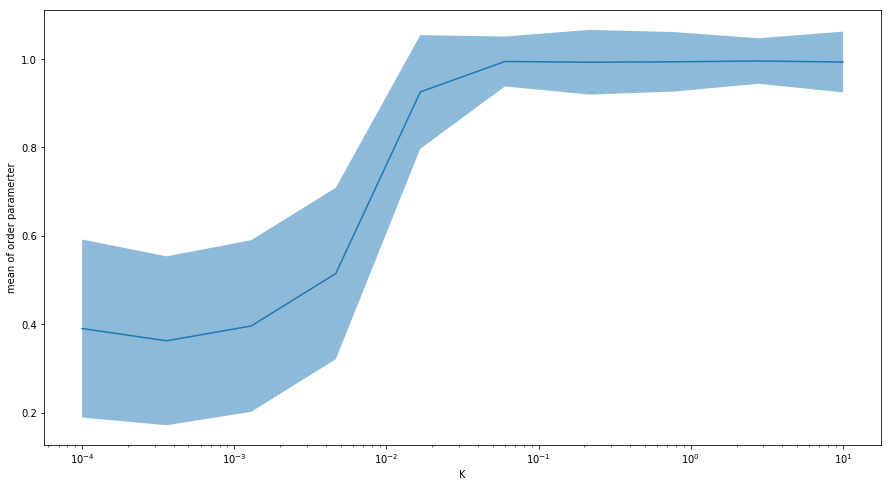

In [48]:
fig, ax=plt.subplots(1, 1,figsize=(15, 8))
ax.plot(K_list, data_result.groupby("K")["op_abs"].mean()) 
ax.fill_between(K_list,
                data_result.groupby("K")["op_abs"].mean() + data_result.groupby("K")["op_abs"].std(), 
                data_result.groupby("K")["op_abs"].mean() - data_result.groupby("K")["op_abs"].std(),
                alpha= 0.5
               ) 

ax.set_xscale("log")
ax.set_xlabel("K")
ax.set_ylabel("mean of order paramerter")

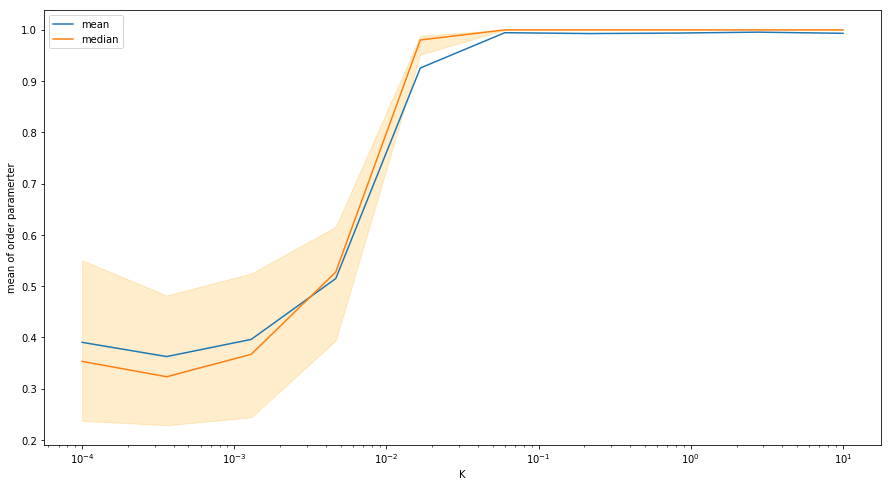

In [57]:
fig, ax=plt.subplots(1, 1,figsize=(15, 8))
ax.plot(K_list, data_result.groupby("K")["op_abs"].mean(), label="mean") 
ax.plot(K_list, data_result.groupby("K")["op_abs"].median(), label="median") 

ax.fill_between(K_list,
                data_result.groupby("K")["op_abs"].quantile(.25) ,
                data_result.groupby("K")["op_abs"].quantile(.75),
                alpha= 0.2,
                color="orange"
               ) 

ax.set_xscale("log")
ax.set_xlabel("K")
ax.set_ylabel("mean of order paramerter")
plt.legend()